In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

from os import listdir
from os.path import isfile, join

In [70]:
results_path = 'D:\\Pablo\\clases\\UJM\\1. Semester, 2020\\Advanced Algorithms\\Project\\code\\Advanced_Algorithmics_Edit_Distance\\run_results'

file_list = [f for f in listdir(results_path) if isfile(join(results_path, f))]

frames = []
for file_name in file_list:
    splitted_name = file_name.split('_')
    df = pd.read_csv(results_path+'/'+file_name)
    df['alphabet_len'] = len(splitted_name[1])
    df['test_type'] = splitted_name[2]
    df['strings_len'] = 'short_string' if splitted_name[3] == '12.csv' else 'long_string'
    frames.append(df)
results = pd.concat(frames)
results = results[['algorithm','alphabet_len','test_type','len','strings_len','clock_time','ed']]

results.head()

,algorithm,alphabet_len,test_type,len,strings_len,clock_time,ed
0,divide_and_conquer,22,atmost20,1,short_string,0.000015,0.0
1,dinamic_programming,22,atmost20,1,short_string,0.000054,0.0
2,dinamic_programming_2,22,atmost20,1,short_string,0.000097,0.0
3,greedy_approach,22,atmost20,1,short_string,0.000061,0.0
4,branch_and_bound_len,22,atmost20,1,short_string,0.000013,0.0


In [47]:
algos_names = {
    'dinamic_programming':'DP Single',
    'dinamic_programming_2':'DP Multiple',
    'divide_and_conquer':'Divide & Conquer',
    'greedy_approach':'Greedy Approach',
    'branch_and_bound_cnt':'BnB Frequency Count',
    'branch_and_bound_len':'BnB String Length',
    'pure_recursion':'Pure Recursion'
    }

test_types = {
    'atmost20' : '20% different',
    'randompair' : 'Random String',
    'samepair' : 'Same String',
}

algos_order = {
    'dinamic_programming':5,
    'dinamic_programming_2':6,
    'divide_and_conquer':4,
    'greedy_approach':7,
    'branch_and_bound_cnt':3,
    'branch_and_bound_len':2,
    'pure_recursion':1
    }

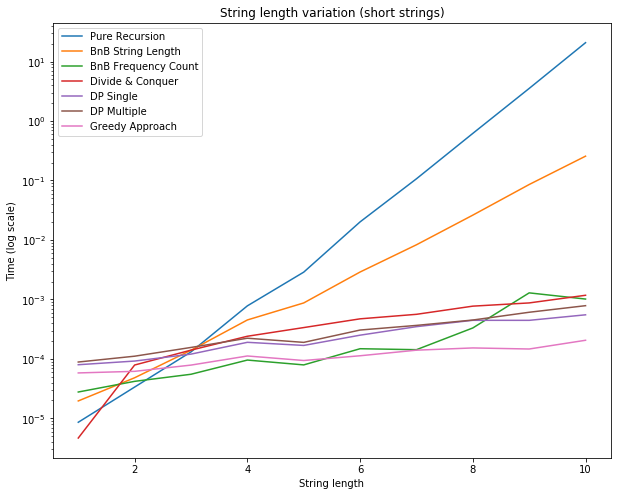

In [81]:
fig, ax = plt.subplots(figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['test_type'] == 'randompair') & (results['test_type'] == 'randompair') & (results['strings_len'] == 'short_string')]
graph_data = graph_data.groupby(['algorithm','len']).mean().reset_index()

graph_data['order'] = graph_data['algorithm'].apply(lambda x: algos_order[x])
graph_data = graph_data.sort_values(by='order')


ax.set_title('String length variation (short strings)')

ax.set_ylabel('Time (log scale)')
ax.set_xlabel('String length')

for algo in graph_data['algorithm'].unique():
#for algo in ['greedy_approach']:
    g = sns.lineplot(data=graph_data[graph_data['algorithm']==algo], x='len', y='clock_time', ax = ax, label=algos_names[algo])

g.set_yscale('log')
    
plt.show()


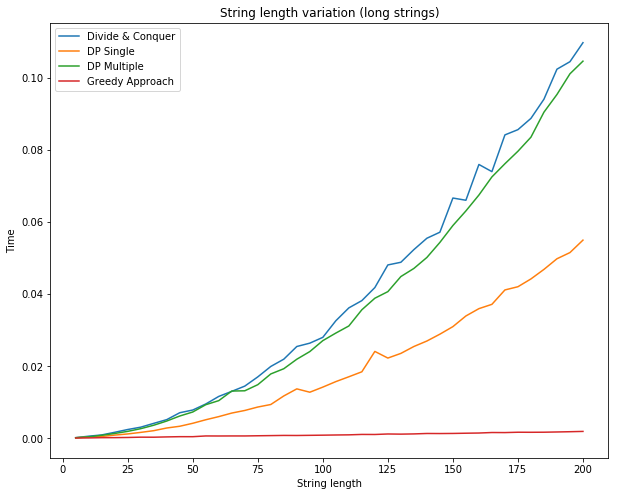

In [82]:
fig, ax = plt.subplots(figsize=(10,8))

graph_data = results[(results['alphabet_len'] == 52) & (results['test_type'] == 'randompair') & (results['test_type'] == 'randompair') & (results['strings_len'] == 'long_string')]
graph_data = graph_data.groupby(['algorithm','len']).mean().reset_index()

graph_data['order'] = graph_data['algorithm'].apply(lambda x: algos_order[x])
graph_data = graph_data.sort_values(by='order')


ax.set_title('String length variation (long strings)')

ax.set_ylabel('Time')
ax.set_xlabel('String length')

for algo in graph_data['algorithm'].unique():
#for algo in ['greedy_approach']:
    g = sns.lineplot(data=graph_data[graph_data['algorithm']==algo], x='len', y='clock_time', ax = ax, label=algos_names[algo])

#g.set_yscale('log')
    
plt.show()


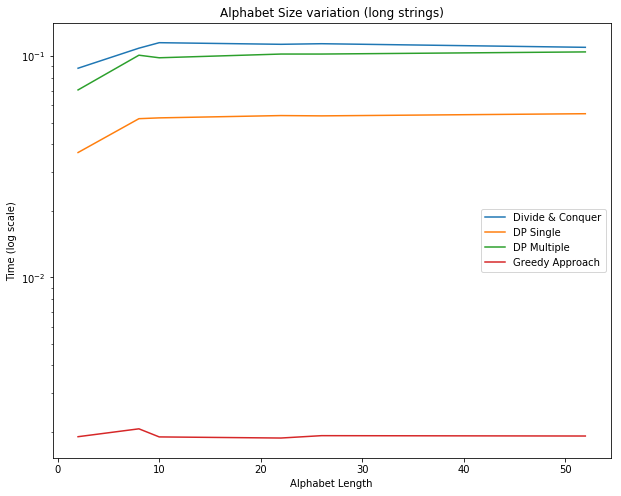

In [74]:
fig, ax = plt.subplots(figsize=(10,8))

graph_data = results[(results['len'] == 200) & (results['test_type'] == 'randompair') & (results['strings_len'] == 'long_string')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

graph_data['order'] = graph_data['algorithm'].apply(lambda x: algos_order[x])
graph_data = graph_data.sort_values(by='order')

ax.set_title('Alphabet Size variation (long strings)')

ax.set_ylabel('Time (log scale)')
ax.set_xlabel('Alphabet Length')

for algo in graph_data['algorithm'].unique():
#for algo in ['greedy_approach']:
    g = sns.lineplot(data=graph_data[graph_data['algorithm']==algo], x='alphabet_len', y='clock_time', ax = ax, label=algos_names[algo])

g.set_yscale('log')
    
plt.show()


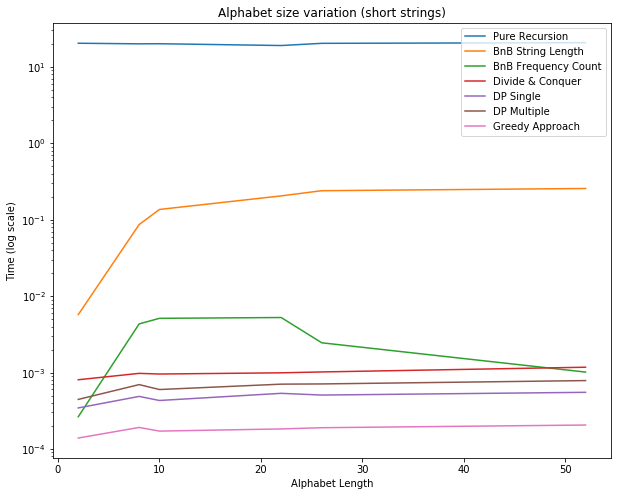

In [71]:
fig, ax = plt.subplots(figsize=(10,8))

graph_data = results[(results['len'] == 10) & (results['test_type'] == 'randompair') & (results['strings_len'] == 'short_string')]
graph_data = graph_data.groupby(['algorithm','alphabet_len','len']).mean().reset_index()

graph_data['order'] = graph_data['algorithm'].apply(lambda x: algos_order[x])
graph_data = graph_data.sort_values(by='order')


ax.set_title('Alphabet size variation (short strings)')

ax.set_ylabel('Time (log scale)')
ax.set_xlabel('Alphabet Length')

for algo in graph_data['algorithm'].unique():
#for algo in ['dinamic_programming','dinamic_programming_2','divide_and_conquer','greedy_approach','branch_and_bound_cnt','branch_and_bound_len']:
#for algo in ['dinamic_programming','dinamic_programming_2','divide_and_conquer','greedy_approach','branch_and_bound_cnt']:
    g = sns.lineplot(data=graph_data[graph_data['algorithm']==algo], x='alphabet_len', y='clock_time', ax = ax, label=algos_names[algo])

g.set_yscale('log')
    
plt.show()


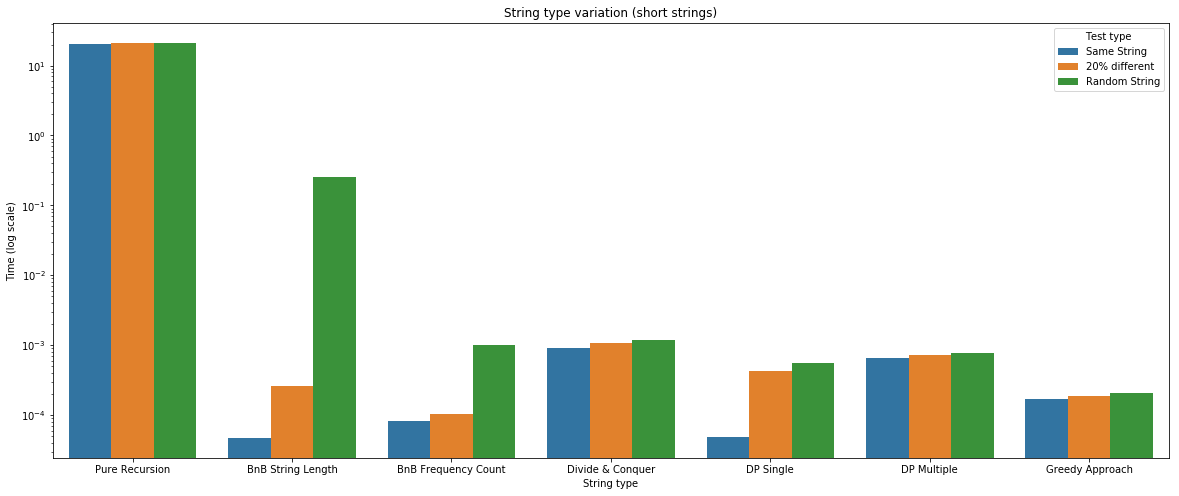

In [72]:
fig, ax = plt.subplots(figsize=(20,8))

graph_data = results[(results['len'] == 10) & (results['alphabet_len'] == 52) & (results['strings_len'] == 'short_string')]
graph_data = graph_data.groupby(['algorithm','test_type','len']).mean().reset_index()

graph_data['order'] = graph_data['algorithm'].apply(lambda x: algos_order[x])
graph_data = graph_data.sort_values(by='order')

graph_data['algorithm'] = graph_data['algorithm'].apply(lambda x: algos_names[x])
graph_data['test_type'] = graph_data['test_type'].apply(lambda x: test_types[x])
graph_data = graph_data.rename(columns={'test_type':'Test type'})



g = sns.barplot(data=graph_data, x='algorithm', y='clock_time', hue='Test type', ax = ax, hue_order=['Same String','20% different','Random String'])
g.set_yscale('log')
g.set_title('String type variation (short strings)')
g.set_ylabel('Time (log scale)')
g.set_xlabel('String type')

plt.show()


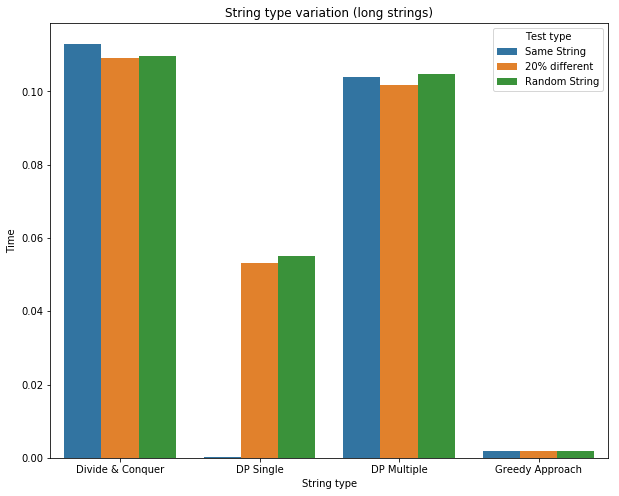

In [73]:
fig, ax = plt.subplots(figsize=(10,8))

graph_data = results[(results['len'] == 200) & (results['alphabet_len'] == 52) & (results['strings_len'] == 'long_string')]
graph_data = graph_data.groupby(['algorithm','test_type','len']).mean().reset_index()

graph_data['order'] = graph_data['algorithm'].apply(lambda x: algos_order[x])
graph_data = graph_data.sort_values(by='order')


graph_data['algorithm'] = graph_data['algorithm'].apply(lambda x: algos_names[x])
graph_data['test_type'] = graph_data['test_type'].apply(lambda x: test_types[x])
graph_data = graph_data.rename(columns={'test_type':'Test type'})
g = sns.barplot(data=graph_data, x='algorithm', y='clock_time', hue='Test type', ax = ax, hue_order=['Same String','20% different','Random String'])
g.set_title('String type variation (long strings)')
g.set_ylabel('Time')
g.set_xlabel('String type')

plt.show()
